# Úvod do TensorFlow

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

## Priamková regresia pomocou TensorFlowu

In [2]:
x = np.linspace(0, 5, 100)
noise = np.random.rand(100) * 10
y = np.array(3 * x**2 - 5*x + 10 + noise, dtype=np.float32)

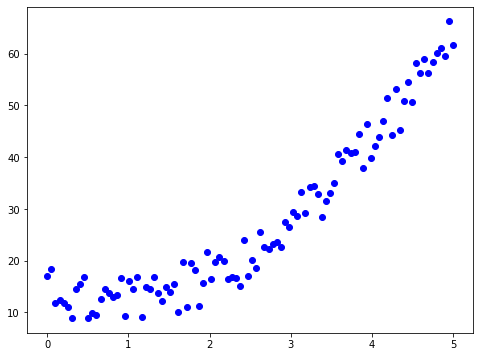

In [3]:
plt.figure(figsize = (8, 6))
plt.plot(x, y, 'bo')

In [12]:
linear_regression_model = Sequential([
    layers.Input(shape=(1)),
    layers.Dense(1)
])

In [13]:
linear_regression_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [6]:
linear_regression_model(np.array([1, 2, 3, 4]))

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[0.91134083],
       [1.8226817 ],
       [2.7340226 ],
       [3.6453633 ]], dtype=float32)>

In [17]:
linear_regression_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.losses.MeanSquaredError()])

In [18]:
linear_regression_model.fit(x, y, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 1108.6396 - mean_squared_error: 955.0455
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 1015.0657 - mean_squared_error: 831.9661
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 931.8480 - mean_squared_error: 802.6766
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 844.8814 - mean_squared_error: 937.5743
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 769.8813 - mean_squared_error: 688.0906
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 693.6198 - mean_squared_error: 611.7320
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 625.8154 - mean_squared_error: 565.1248
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 561.9393 - mean_squared_error: 528.4963
Epoch 9/100
4/4 [==============================] - ETA: 0s - loss: 652.3837 - mean_squared_error: 652.38 - 0s 

4/4 [==============================] - 0s 2ms/step - loss: 44.0980 - mean_squared_error: 52.7995
Epoch 75/100
4/4 [==============================] - 0s 2ms/step - loss: 44.0099 - mean_squared_error: 38.2406
Epoch 76/100
4/4 [==============================] - 0s 2ms/step - loss: 43.8812 - mean_squared_error: 38.0149
Epoch 77/100
4/4 [==============================] - 0s 2ms/step - loss: 43.7555 - mean_squared_error: 42.3995
Epoch 78/100
4/4 [==============================] - 0s 2ms/step - loss: 43.6446 - mean_squared_error: 36.5250
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 43.5643 - mean_squared_error: 45.7189
Epoch 80/100
4/4 [==============================] - 0s 2ms/step - loss: 43.4888 - mean_squared_error: 36.0180
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 43.4052 - mean_squared_error: 56.2199
Epoch 82/100
4/4 [==============================] - 0s 4ms/step - loss: 43.3492 - mean_squared_error: 41.0773
Epoch 83/100
4/4 [=====

In [19]:
predictions = linear_regression_model.predict(x)

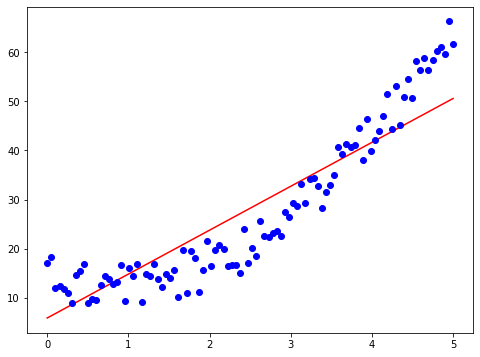

In [20]:
plt.figure(figsize = (8, 6))
plt.plot(x, predictions, 'red')
plt.plot(x, y, 'bo')

In [21]:
def least_squares_method(x, y):
    
    F = np.array([np.ones(100), x])
    F = np.transpose(F)
    
    theta = np.linalg.multi_dot([np.linalg.pinv(np.transpose(F).dot(F)), np.transpose(F), y])
    return theta

In [22]:
theta = least_squares_method(x, y)

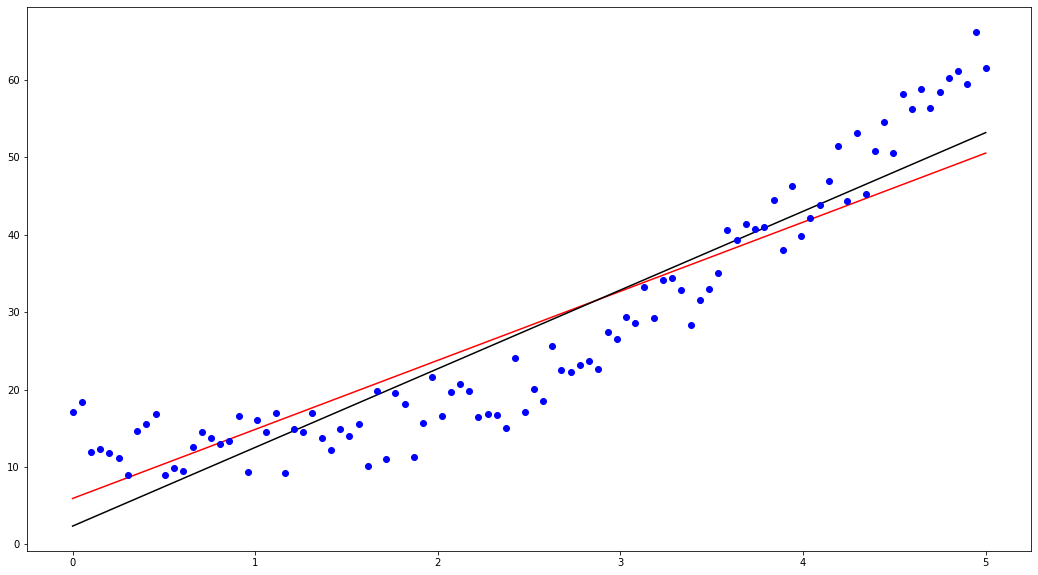

In [23]:
ls_predictions = theta[0] + theta[1]*x
plt.figure(figsize=(18, 10))
plt.plot(x, predictions, 'red')
plt.plot(x, ls_predictions, 'black')
plt.plot(x, y, 'bo')

In [24]:
linear_regression_model.trainable_weights

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[8.9304905]], dtype=float32)>,
 <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([5.916349], dtype=float32)>]

In [25]:
theta

array([ 2.34457546, 10.17447555])

## Kvadratická regresia

In [26]:
model = Sequential([
    layers.Input(shape=(2)),
    layers.Dense(1)
])

In [27]:
model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.1),
    loss = tf.keras.losses.MeanSquaredError(),
    metrics = [tf.keras.losses.MeanSquaredError()])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [29]:
input_x = np.array([x, x**2]).transpose()

In [30]:
model.fit(input_x, y, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 515.8042 - mean_squared_error: 438.5710
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 302.1046 - mean_squared_error: 270.0703
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 167.1927 - mean_squared_error: 155.1043
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 80.1605 - mean_squared_error: 73.7568
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 47.2187 - mean_squared_error: 39.8518
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 42.0418 - mean_squared_error: 35.0671
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 49.3221 - mean_squared_error: 56.2952
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 55.3270 - mean_squared_error: 54.7637
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 52.6129 - mean_squared_error: 67.7581
Epoch 10/100


Epoch 75/100
4/4 [==============================] - ETA: 0s - loss: 16.1416 - mean_squared_error: 16.14 - 0s 2ms/step - loss: 11.9302 - mean_squared_error: 13.2501
Epoch 76/100
4/4 [==============================] - 0s 2ms/step - loss: 11.8645 - mean_squared_error: 12.0925
Epoch 77/100
4/4 [==============================] - 0s 3ms/step - loss: 11.9262 - mean_squared_error: 10.5688
Epoch 78/100
4/4 [==============================] - 0s 4ms/step - loss: 12.0071 - mean_squared_error: 12.5972
Epoch 79/100
4/4 [==============================] - 0s 2ms/step - loss: 11.9191 - mean_squared_error: 10.8827
Epoch 80/100
4/4 [==============================] - 0s 5ms/step - loss: 11.6878 - mean_squared_error: 11.2673
Epoch 81/100
4/4 [==============================] - 0s 2ms/step - loss: 11.7061 - mean_squared_error: 12.5041
Epoch 82/100
4/4 [==============================] - 0s 2ms/step - loss: 11.7153 - mean_squared_error: 10.5909
Epoch 83/100
4/4 [==============================] - 0s 3ms/step - 

In [31]:
predictions = model.predict(input_x)

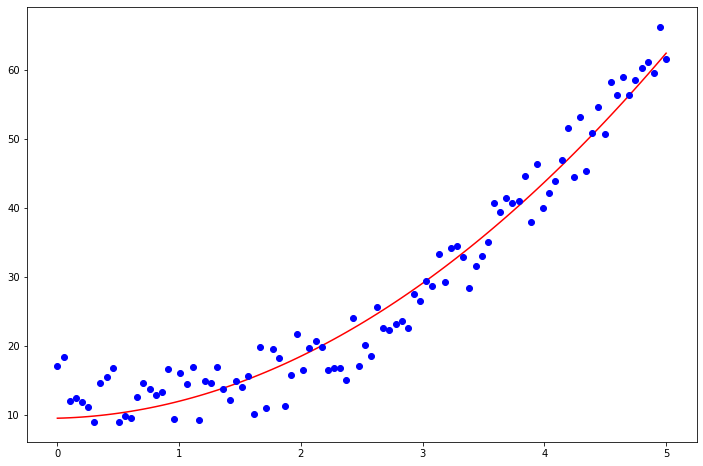

In [32]:
plt.figure(figsize=(12, 8))
plt.plot(x, predictions, 'red')
plt.plot(x, y, 'bo')

## Deep neural networks

### Jednoduché rozpoznávanie obrazu

In [33]:
import tensorflow_datasets as tfds

import seaborn
import imageio

In [34]:
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

In [35]:
def plot_random_picture(ds, shuffle = False):
    if shuffle:
        ds = ds.shuffle(42)
    for i in ds.take(1):
        pic = i[0].numpy().copy()
        pic = pic.reshape(28, 28)
        seaborn.heatmap(pic)
        print('LABEL:', i[1].numpy())
        return i[0].numpy()

LABEL: 3


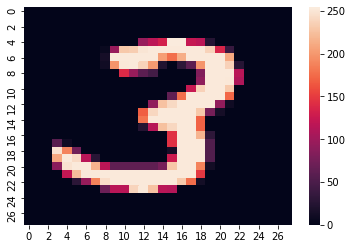

In [37]:
pic = plot_random_picture(ds_train, True)

In [38]:
print('image dimensions:', pic.shape)
pic

image dimensions: (28, 28, 1)


array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

In [39]:
def normalize_img(image, label):
  """Normalizes images: `uint8` -> `float32`."""
  return tf.cast(image, tf.float32) / 255., label

In [40]:
ds_train = ds_train.map(normalize_img)
ds_train = ds_train.batch(16)

In [41]:
ds_test = ds_test.map(normalize_img)
ds_test = ds_test.batch(16)

In [42]:
model = Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [44]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [45]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [46]:
model.fit(
    ds_train,
    epochs=6,
    validation_data=ds_test,
)

Epoch 1/6
3750/3750 [==============================] - 13s 4ms/step - loss: 0.2283 - sparse_categorical_accuracy: 0.9335 - val_loss: 0.1305 - val_sparse_categorical_accuracy: 0.9598
Epoch 2/6
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0996 - sparse_categorical_accuracy: 0.9703 - val_loss: 0.1125 - val_sparse_categorical_accuracy: 0.9642
Epoch 3/6
3750/3750 [==============================] - 9s 2ms/step - loss: 0.0664 - sparse_categorical_accuracy: 0.9801 - val_loss: 0.0939 - val_sparse_categorical_accuracy: 0.9706
Epoch 4/6
3750/3750 [==============================] - 10s 3ms/step - loss: 0.0477 - sparse_categorical_accuracy: 0.9859 - val_loss: 0.0868 - val_sparse_categorical_accuracy: 0.9740
Epoch 5/6
3750/3750 [==============================] - 13s 3ms/step - loss: 0.0355 - sparse_categorical_accuracy: 0.9896 - val_loss: 0.0903 - val_sparse_categorical_accuracy: 0.9738
Epoch 6/6
3750/3750 [==============================] - 12s 3ms/step - loss: 0.0271 - sparse_

In [47]:
model.evaluate(ds_test)

625/625 [==============================] - 1s 2ms/step - loss: 0.0956 - sparse_categorical_accuracy: 0.9733


[0.09562628716230392, 0.9732999801635742]

In [48]:
def predict_for_png(model):
    
    im = imageio.imread('pic.png')
    im = np.mean(im, -1) / 255
    im = 1 - im
    im = im.reshape(28, 28, 1)
    
    ds = tf.data.Dataset.from_tensor_slices([im])
    ds = ds.batch(1)
    
    predictions = model.predict(ds)
    predictions = predictions[0].tolist()
    
    for i in range(10):
        print(i, ' : ', np.round(predictions[i], 4))
    
    return predictions

In [50]:
predictions = predict_for_png(model)

0  :  0.0
1  :  0.9995
2  :  0.0
3  :  0.0001
4  :  0.0001
5  :  0.0
6  :  0.0
7  :  0.0
8  :  0.0002
9  :  0.0


In [54]:
conv_model = Sequential([
    layers.Conv2D(1, 3, input_shape=(28, 28, 1), activation='relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [55]:
conv_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 1)         10        
_________________________________________________________________
average_pooling2d_2 (Average (None, 13, 13, 1)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 169)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                5440      
_________________________________________________________________
dense_10 (Dense)             (None, 10)                330       
Total params: 5,780
Trainable params: 5,780
Non-trainable params: 0
_________________________________________________________________


In [56]:
conv_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [57]:
conv_model.fit(ds_train, epochs=6)

Epoch 1/6
3750/3750 [==============================] - 24s 6ms/step - loss: 0.3618 - sparse_categorical_accuracy: 0.8943
Epoch 2/6
3750/3750 [==============================] - 25s 7ms/step - loss: 0.1846 - sparse_categorical_accuracy: 0.9467
Epoch 3/6
3750/3750 [==============================] - 23s 6ms/step - loss: 0.1475 - sparse_categorical_accuracy: 0.9572
Epoch 4/6
3750/3750 [==============================] - 20s 5ms/step - loss: 0.1282 - sparse_categorical_accuracy: 0.9628
Epoch 5/6
3750/3750 [==============================] - 20s 5ms/step - loss: 0.1148 - sparse_categorical_accuracy: 0.9659
Epoch 6/6
3750/3750 [==============================] - 23s 6ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9689


In [58]:
conv_model.evaluate(ds_test)

625/625 [==============================] - 3s 4ms/step - loss: 0.1222 - sparse_categorical_accuracy: 0.9656


[0.1222415640950203, 0.9656000137329102]

In [59]:
conv_preds = predict_for_png(conv_model)

0  :  0.0003
1  :  0.9111
2  :  0.0402
3  :  0.0075
4  :  0.0008
5  :  0.0053
6  :  0.0046
7  :  0.0042
8  :  0.0256
9  :  0.0004
